

{% include toc title="In This Lesson" icon="file-text" %}



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Be able to describe the characteristics of 3 key vector data structures: points, lines and polygons.

* Be able to open a shapefile in R using `readOGR()`.

* Be able to view the metadata of a vector spatial layer in R including CRS

* Be able to access the tabular (`data.frame`) attributes of a vector spatial layer in `R`.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need



You will need a computer with internet access to complete this lesson and the data for week 5 of the course.



[<i class="fa fa-download" aria-hidden="true"></i> Download Week 5 Data (~500 MB)](https://ndownloader.figshare.com/files/7525363){:data-proofer-ignore='' .btn }



</div>



## About Vector Data

Vector data are composed of discrete geometric locations (x,y values) known as **vertices** that define the "shape" of the spatial object. The organization of the vertices, determines the type of vector that we are working 
with: point, line or polygon.



<figure>
    <a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/pnt_line_poly.png">
    <img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/pnt_line_poly.png" alt="points lines and polygons graphic."></a>
    <figcaption> There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)
    </figcaption>
</figure>



* **Points:** Each individual point is defined by a single x, y coordinate. There can be many points in a vector point file. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

* **Lines:** Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each "bend" in the road or stream represents a vertex that has defined `x, y` location.

* **Polygons:** A polygon consists of 3 or more vertices that are connected and "closed". Thus the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons. Occasionally, a polygon can have a hole in the middle of it (like a doughnut), this is something to be aware of but not an issue we will deal with in this tutorial.


<i class="fa fa-star"></i> **Data Tip:** Sometimes, boundary layers such as states and countries, are stored as lines rather than polygons. However, these boundaries, when represented as a line, will not create a closed object with a defined "area" that can be "filled".
{: .notice}



## Shapefiles: Points, Lines, and Polygons

Geospatial data in vector format are often stored in a `shapefile` format. Because the structure of points, lines, and polygons are different, each individual shapefile can only contain one vector type (all points, all lines 
or all polygons). You will not find a mixture of point, line and polygon objects in a single shapefile.

Objects stored in a shapefile often have a set of associated `attributes` that describe the data. For example, a line shapefile that contains the locations of streams, might contain the associated stream name, stream "order" and other 
information about each stream line object.



* More about shapefiles can found on <a href="https://en.wikipedia.org/wiki/Shapefile" target="_blank">Wikipedia</a>.



## Import Shapefiles


We will use the `geopandas` library to work with vector data in `R`. We will also use `matplotlib.pyplot` to plot our data and `folium`. 



In [21]:
## Note not sure what folium does...  leaflet interactive mapping
## had to install it via pip rather than conda... 
## will need some discussion on using pip vs conda...

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
# import folium
import os.path as op
# is there any reason to not just import os 
import os
# what does this do?
plt.ion()

In [4]:
# os.getcwd()
# be sure to set your working directory
os.chdir("/Users/lewa8222/Documents/earth-analytics")

#print os.getcwd();


The shapefiles that we will import are:

* A polygon shapefile representing our field site boundary,
* A line shapefile representing roads, and
* A point shapefile representing the location of field sites at the <a href="http://www.neonscience.org/science-design/field-sites/harvard-forest" target="_blank"> San Joachin field site</a>.

The first shapefile that we will open contains the point locations of plots where trees have been measured. To import shapefiles we use the `geopandas` function `read_file()`. Notice that we call the `read_file()` function using `gpd.read_file()` to tell python to look for the function within the `geopandas` library.


In [2]:
# path_data = '../../../../../../../data/week05/'

sjer_plot_locations = gpd.read_file(filename="data/week5/california/SJER/vector_data/SJER_plot_centroids.shp")
# view attribute table of data
sjer_plot_locations

NameError: name 'gpd' is not defined

We can view the type of object that we are working with using the `type()` function. Here we can see that our `sjer_plot_locations` object is a `geopandas geodataframe`. 

In [7]:
# what type of object did we import
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame


<i class="fa fa-star"></i> **Data Tip:** The acronym, OGR, refers to the OpenGIS Simple Features Reference Implementation. <a href="https://trac.osgeo.org/gdal/wiki/FAQGeneral" target="_blank"> Learn more about OGR.</a>
{: .notice}


## Shapefile Metadata & Attributes

When we import the `SJER_plot_centroids` shapefile layer into `Python` the `gpd.read_file()` function automatically stores information about the data. We are particularly interested in the geospatial **metadata**, describing the format, `CRS`, `extent`, and other components of the vector data, and the **attributes** which describe properties associated with each individual vector object.


## Spatial Metadata

Key metadata for all shapefiles include:

1. **Object Type:** the class of the imported object.
2. **Coordinate Reference System (CRS):** the projection of the data.
3. **Extent:** the spatial extent (geographic area that the shapefile covers) of the shapefile. Note that the spatial extent for a shapefile represents the extent for ALL spatial objects in the shapefile.

We can view shapefile metadata using the `class`, `crs` and `extent` methods:


In [12]:
# don't understand what this is doing
# getattr(sjer_plot_locations.head(), attr)

# view the spatial extent
sjer_plot_locations.total_bounds

(254738.61799999999, 4107527.074, 258497.10200000001, 4112167.7779999999)

In [14]:
# Get summary of several key spatial attributes  
#for attr in ['crs', 'total_bounds', 'length']:
#    print(attr, '\n', getattr(sjer_plot_locations.head(), attr), '\n---\n')

# view the crs or coordinate reference system of the data
sjer_plot_locations.crs


{'init': 'epsg:32611'}

The CRS for our data is epsg code: 32611. We will discuss CRS' in a later lesson but for now a quick google search reveals that this CRS is: UTM zone 11 North - WGS84 

http://spatialreference.org/ref/epsg/wgs-84-utm-zone-11n/


In [1]:
# view the type of geometry contained in the spatial object
sjer_plot_locations.geom_type


NameError: name 'sjer_plot_locations' is not defined

## How do i count the number of objects in the geopandas dataframe? 

In [38]:
# view the type of geometry contained in the spatial object
length(sjer_plot_locations.geom_type)

NameError: name 'length' is not defined

The CRS **UTM zone 18N**. The CRS is critical to interpreting the object `extent` values as it specifies units.


<figure>
    <a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/spatial_extent.png">
    <img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/spatial_extent.png" alt="the spatial extent represents the spatial area that a particular dataset covers."></a>
    <figcaption>The spatial extent of a shapefile or R spatial object represents
    the geographic "edge" or location that is the furthest north, south east and
    west. Thus is represents the overall geographic coverage of the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>



## Spatial Data Attributes

Each object in a shapefile has one or more attributes associated with it.
Shapefile attributes are similar to fields or columns in a spreadsheet. Each row
in the spreadsheet has a set of columns associated with it that describe the row
element. In the case of a shapefile, each row represents a spatial object - for
example, a road, represented as a line in a line shapefile, will have one "row"
of attributes associated with it. These attributes can include different types
of information that describe objects stored within a shapefile. Thus, our road,
may have a name, length, number of lanes, speed limit, type of road and other
attributes stored with it.



<figure>

    <a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/attribute_table.png">
    <img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/attribute_table.png" alt="A shapefile has an associated attribute table. Each spatial feature in an R spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate *.dbf file. "></a>
    <figcaption>Each spatial feature in an R spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate *.dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>


We view the attribute table associated with our geopandas `GeoDataFrame` by simply typing the object name into the console
(e.g., `sjer_plot_locations`).


In [25]:
# view attribute table associated with the data
sjer_plot_locations

,Plot_ID,Point,easting,geometry,northing,plot_type
0,SJER1068,center,255852.376,POINT (255852.376 4111567.818),4111567.818,trees
1,SJER112,center,257406.967,POINT (257406.967 4111298.971),4111298.971,trees
2,SJER116,center,256838.760,POINT (256838.76 4110819.876),4110819.876,grass
3,SJER117,center,256176.947,POINT (256176.947 4108752.026),4108752.026,trees
4,SJER120,center,255968.372,POINT (255968.372 4110476.079),4110476.079,grass
5,SJER128,center,257078.867,POINT (257078.867 4111388.57),4111388.570,trees
6,SJER192,center,256683.434,POINT (256683.434 4111071.087),4111071.087,grass
7,SJER272,center,256717.467,POINT (256717.467 4112167.778),4112167.778,trees
8,SJER2796,center,256034.390,POINT (256034.39 4111533.879),4111533.879,soil
9,SJER3239,center,258497.102,POINT (258497.102 4109856.983),4109856.983,soil


In this case, we have several attributes associated with our points including:

* Plot_ID, Point, easting, geometry, northing, plot_type 


## Metadata & Attribute Summary

We can view a metadata & attribute summary of each shapefile using a for loop to access the attributes that we are interested in. Below we include the **coordinate reference system** (`crs`) and the spatial **extent**.



In [28]:
for attr in ['crs', 'total_bounds']:
    print(attr, '\n', getattr(sjer_plot_locations.head(), attr))


crs 
 {'init': 'epsg:32611'}
total_bounds 
 (255852.37599999999, 4108752.0260000001, 257406.967, 4111567.818)


# Plot a Shapefile

Next, let's visualize the data in our `R` `spatialpointsdataframe` object using the `.plot()` method.

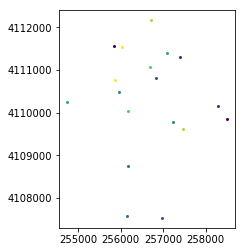

In [29]:
# quickly plot the data
sjer_plot_locations.plot()

We can adjust the symbol size of our plot using the `markersize` argument.
We can add a title using `ax.set_title()`.

We can create a larger map by adjusting the `figsize` argument. Below we set it to 10 x 10. 

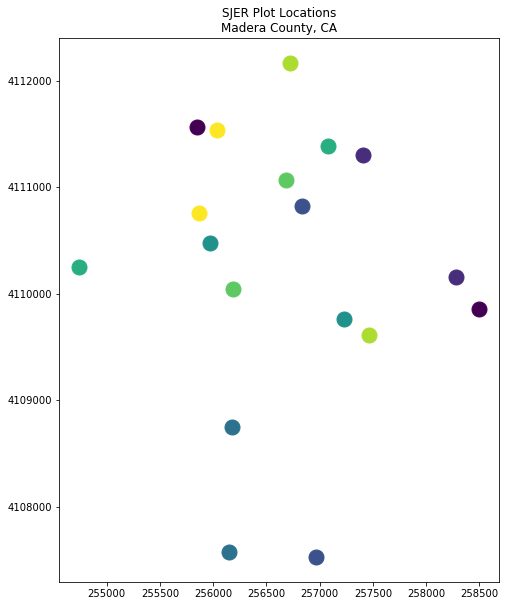

In [33]:
# Plot the data adjusting marker size and colors
# # 'col' sets point symbol color

ax = sjer_plot_locations.plot(figsize=(10, 10), markersize=15)
# add a title to the plot
ax.set_title('SJER Plot Locations\nMadera County, CA')

### Change plot colors & symbols

We can use the cmap argument to adjust the colors of our plot. Below we used a colormap that is a part of the matplotlib colormap library.

http://matplotlib.org/users/colormaps.html

Finally we use the marker= argument to specify the marker style.

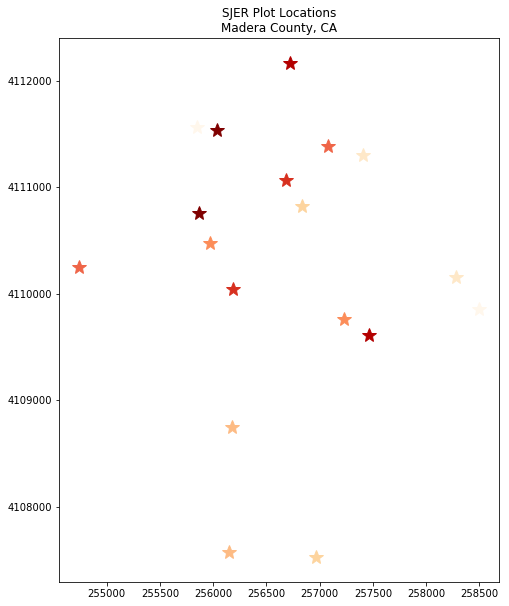

In [37]:
ax = sjer_plot_locations.plot(figsize=(10, 10), marker='*', markersize=15, cmap='OrRd')
# add a title to the plot
ax.set_title('SJER Plot Locations\nMadera County, CA')


<div class="notice--warning" markdown="1">


## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Test your knowledge: Import Line & Polygon Shapefiles

Using the steps above, import the `data/week5/california/madera-county-roads/tl_2013_06039_roads` and `data/week5/california/SJER/vector_data/SJER_crop.shp` shapefiles into your `Jupyter notebook`. Call the roads object `sjer_roads` and the crop layer `sjer_crop_extent`.

Answer the following questions:

1. What type of spatial object is created when you import each layer?
2. What is the geom_type of each layer (points, lines or polygons)?
2. What is the `CRS` and spatial `extent` for each layer?
4. How many spatial objects are in each file?
</div>


In [46]:
## NOTE that this is the answer to the challenge and thus needs to be hidden. 

# ```{r import-point-line, echo=FALSE, results="hide" }
# import line shapefile
# sjer_roads <- readOGR("data/week5/california/madera-county-roads",
#                       layer = "tl_2013_06039_roads")


# sjer_crop_extent <- readOGR("data/week5/california/SJER/vector_data/",
#                             "SJER_crop")

# 1
# class(sjer_roads)
# class(sjer_plot_locations)

# # 2
# crs(sjer_roads)
# extent(sjer_roads)
# crs(sjer_plot_locations)
# extent(sjer_plot_locations)

# 3
# #sjer_roads contains only lines and sjer_plot_locations contains only 1 point

# 4 -> numerous ways to find this; sjer_roads=13,
# length(sjer_roads)  #easiest, but not previously taught
# sjer_roads  #look at 'features'
# attributes(sjer_roads)  #found in the $data section as above


# sjer_roads = gpd.read_file(op.join(path_data, 'california', 'madera-county-roads', 'tl_2013_06039_roads.shp'))
sjer_roads = gpd.read_file("data/week5/california/madera-county-roads/tl_2013_06039_roads.shp")
#sjer_crop_extent = gpd.read_file(op.join(path_data, 'california', 'SJER', 'vector_data', 'SJER_crop.shp'))
sjer_crop_extent = gpd.read_file("data/week5/california/SJER/vector_data/SJER_crop.shp")


print("CRS:", sjer_roads.crs)
print("Spatial Extent roads layer:", sjer_roads.total_bounds)
sjer_roads.geom_type
print("CRS:",sjer_crop_extent.crs)
print("Spatial Extent crop boundary:", sjer_crop_extent.total_bounds)
sjer_crop_extent.geom_type

CRS: {'init': 'epsg:4269'}
Spatial Extent roads layer: (-120.530241, 36.771308999999995, -119.031075, 37.686847)
CRS: {'init': 'epsg:32611'}
Spatial Extent crop boundary: (254570.56699999966, 4107303.0768445507, 258867.40933092419, 4112361.9202610701)


0    Polygon
dtype: object



## Plot Multiple Shapefiles

The `.plot` method can be used to plot spatial objects. Use the following arguments to add a title to your plot and to layer several spatial objects

on top of each other in your plot.



* `add = TRUE`: overlay a shapefile or raster on top the existing plot. This argument mimics layers in a typical GIS application like QGIS.

* `main=""`: add a title to the plot. To add a line break to your title, use `\n` where the line break should occur.




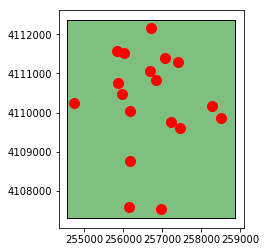

In [47]:
# ```{r plot-multiple-shapefiles, fig.cap="plot of sjer plots layered on top of the crop extent." }

# # Plot multiple shapefiles

# plot(sjer_crop_extent, col = "lightgreen",

#      main="NEON Harvard Forest\nField Site")

# plot(sjer_roads, add = TRUE)


# ```
# reproject the data
sjer_roads = sjer_roads.to_crs(sjer_plot_locations.crs)


# plot the data - overlayed
ax = sjer_crop_extent.plot(color='g', alpha=.5)
sjer_plot_locations.plot(ax=ax, markersize=10, color='r')
# add a title to the plot
ax.set_title('SJER Plot Locations\nMadera County, CA')

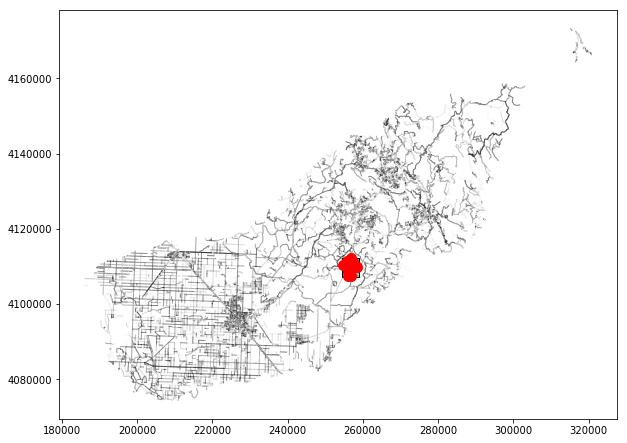

In [49]:
ax = sjer_roads.plot(cmap='Greys', alpha=.5, figsize=(10, 10))
sjer_crop_extent.plot(color='g', ax=ax, alpha=.5)
sjer_plot_locations.plot(ax=ax, markersize=10, color='r')

Why is plotting so slow?
I remember chris asking about this - it really is a lot slower than R. 
* Can we zoom in to the extent of another object when we plot?
* Should i introduce crop here?

In [54]:
# get spatial extent
bounds = sjer_crop_extent.geometry.bounds
bounds

,minx,miny,maxx,maxy
0,254570.567,4.107303e+06,258867.409331,4.112362e+06


We can zoom in on just our study area - defined by the sjer_crop_extent layer by defining the xlim and ylim coordinate boundaries. 

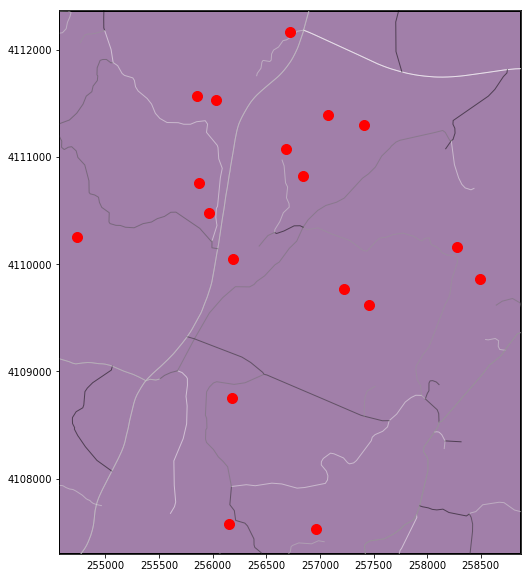

In [56]:
ax = sjer_crop_extent.plot(alpha=.5, figsize=(10, 10))
sjer_roads.plot(cmap='Greys', ax=ax, alpha=.5)
sjer_plot_locations.plot(ax=ax, markersize=10, color='r')

# set the bounds of the map using the extent object
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);